# embed-text-doc2vec

based on https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

first, let's install some dependencies. a guide to doing this: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

In [1]:
# Install a conda package in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} gensim nltk

Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /Users/m/anaconda3/envs/d2s:
#
gensim                    2.3.0               np113py36_0  
nltk                      3.2.4                    py36_0  


In [2]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

Let’s prepare data for training our doc2vec model

In [3]:
data_dir = '../../data/'

# our list of documents
data = []

In [4]:
import glob
txt_files = glob.glob(f"{data_dir}/*.txt")
print(len(txt_files))

141


In [5]:
# should an example of just the filename without the path
txt_files[0][11:]

'Trieu et al. - 2017 - News Classification from Social Media Using Twitte.txt'

In [6]:
for file in txt_files:
    with open(file, 'r', encoding="utf-8") as file:
        currentText = file.read()
        data.append(currentText)
        file.close()

print(len(data))

141


In [7]:
from random import randrange
random_index = randrange(len(data)-1)

# print the first 1000 characters of a random document from our corpus
print(data[random_index][0:1000])

t-SNE-CUDA: GPU-Accelerated t-SNE and its
Applications to Modern Data
David M. Chan†∗ , Roshan Rao†‡ , Forrest Huang†§ and John F. Canny¶

arXiv:1807.11824v1 [cs.LG] 31 Jul 2018

EECS Department, University of California, Berkeley
Berkeley, CA, USA
Email: ∗ davidchan@berkeley.edu, ‡ roshan rao@berkeley.edu, § forrest huang@berkeley.edu, ¶ canny@berkeley.edu

Abstract—Modern datasets and models are notoriously difficult
to explore and analyze due to their inherent high dimensionality and massive numbers of samples. Existing visualization
methods which employ dimensionality reduction to two or three
dimensions are often inefficient and/or ineffective for these
datasets. This paper introduces t-SNE-CUDA, a GPU-accelerated
implementation of t-distributed Symmetric Neighbour Embedding (t-SNE) for visualizing datasets and models. t-SNE-CUDA
significantly outperforms current implementations with 50-700x
speedups on the CIFAR-10 and MNIST datasets. These speedups
enable, for the first time, vi

In [7]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), 
    tags=[str(i)]) for i, _d in enumerate(data)]

Here we have a list of four sentences as training data. Now I have tagged the data and its ready for training. Lets start training our model.

In [8]:
max_epochs = 100
vec_size = 20
alpha = 0.025
model = Doc2Vec(size=vec_size,
                alpha=alpha,
                min_alpha=0.00025,
                min_count=1,
                dm=1)

In [9]:
model.build_vocab(tagged_data)

In [10]:
for epoch in range(max_epochs):
    print ('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
    
model.save("d2v.model")
print("Model d2v.model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

Note: dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm =0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order.

So we have saved the model and it’s ready for implementation. Lets play with it.

In [8]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")

#to find the vector of a document which is not in the training data
test_data = word_tokenize("I love chatbots".lower())
v1 = model.infer_vector(test_data)
print("V1_infer", v1)




V1_infer [-0.06320606  0.13354899 -0.00905937 -0.15052865 -0.0656832  -0.08900937
 -0.03807721  0.06431425 -0.03522163 -0.00434883  0.17990938 -0.17053865
  0.12665445  0.00974187 -0.04312205 -0.05760925 -0.0033351   0.15536761
 -0.0203139  -0.02130702]


In [9]:
# to find most similar doc using tags
similar_doc = model.docvecs.most_similar('1')
print(similar_doc)

[('70', 0.9870254397392273), ('84', 0.9709815979003906), ('7', 0.96864914894104), ('94', 0.960952639579773), ('72', 0.9577339291572571), ('14', 0.9566090106964111), ('18', 0.953985333442688), ('82', 0.9523268938064575), ('97', 0.9513706564903259), ('0', 0.9446595907211304)]


In [10]:
# to find vector of doc in training data using tags
# or in other words printing the vector of the document 
# at index 1 in the training data
print(model.docvecs['1'])

[ -9.342972  -17.231485  -16.349152   17.070536    8.355379   -3.7523832
  13.2250395 -11.772013    6.22972    11.040406  -12.797823   -1.3005092
 -17.47004    -5.203946    4.065793   -2.5147984   5.3141646 -10.981502
  16.272821   -1.7505883]


In [11]:
# how many dimensions does our doc2vec document space have?
dimensions = len(model.docvecs['1'])
print(dimensions)

20


Cool! This dimensionality is determined by the `vec_size` parameter we specified at training time.

In [12]:
# create column headers for csv file
headers = ['doc']
i = 0
while i < dimensions:
    headers.append(f"v{i}")
    i+=1
    
print(headers)

['doc', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19']


In [13]:
# retrieve vectors of all documents in training data
# write vectors to a csv file
import csv

with open('document-vectors.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='"')
    writer.writerow(headers)
    
    index_count = len(data)-1
    i = 0
    while i <= index_count:
        doc_name = txt_files[i][11:]
        vec = list(model.docvecs[i])
        row = [doc_name] + vec
        writer.writerow(row)
        i += 1


In [14]:
# read vectors in from csv file
import csv

imported_vectors = []

with open('document-vectors.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in reader:
        imported_vectors.append(row)
        
print(imported_vectors[0:2])

[['doc', 'v0', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19'], ['Trieu et al. - 2017 - News Classification from Social Media Using Twitte.txt', '-13.4145975', '-18.038366', '-19.62516', '18.35972', '11.599665', '2.9987159', '10.919366', '-17.313543', '14.515337', '11.669583', '-22.579699', '2.5911036', '-25.282722', '-3.9854567', '6.8831143', '-7.8187785', '-1.4719993', '-6.839098', '15.382307', '-3.3383198']]


In [19]:
# project from 20D to 2D with t-SNE
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [20]:
model.docvecs

In [21]:
df = pd.DataFrame(list(model.docvecs))

def stripPath(file):
    return file[11:]

# list(map(stripPath, txt_files))

# y is supposed to be some ground truth categories. got it. 
df['y'] = list(range(0,len(list(model.docvecs))))
df['label'] = df['y'].apply(lambda i: str(i))

# X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (141, 22)


In [22]:
# For reproducibility of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

In [23]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 141 samples in 0.000s...
[t-SNE] Computed neighbors for 141 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 26.328567
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.034737
[t-SNE] KL divergence after 300 iterations: 0.137496
t-SNE done! Time elapsed: 0.24083900451660156 seconds


In [39]:
print(tsne_results[:10])

[[  9.208676  -11.6980915]
 [  9.343998  -12.600469 ]
 [  8.179732  -13.854516 ]
 [  8.435254  -13.312654 ]
 [  8.868621  -13.313231 ]
 [  8.369935  -12.56009  ]
 [  8.606954  -12.832229 ]
 [  8.68038   -12.203191 ]
 [  7.6478868 -13.404402 ]
 [  8.20842   -12.158315 ]]


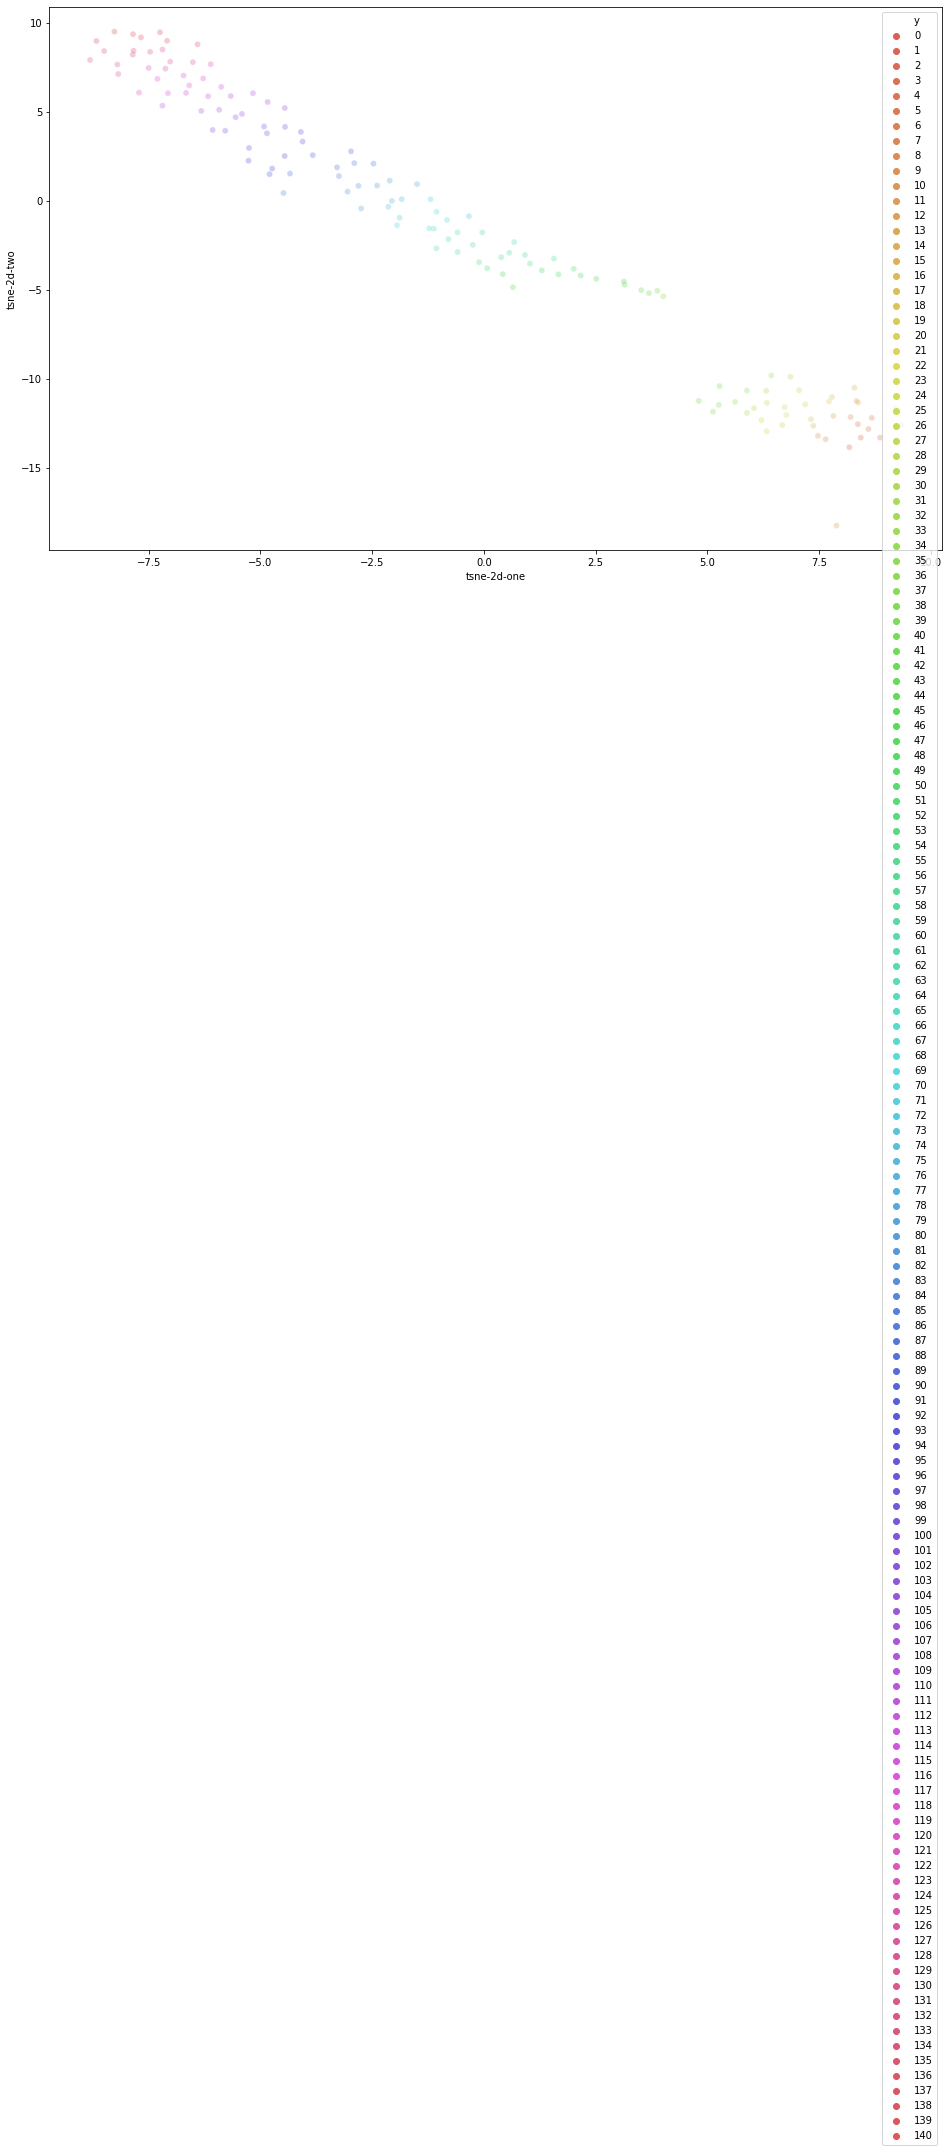

In [50]:
# visualize t-SNE projection
results = df.copy()

results['tsne-2d-one'] = tsne_results[:,0]
results['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
#     hue="y",
    palette=sns.color_palette("hls", 141),
    data=results,
    legend="full",
    alpha=0.3
)

In [41]:
print(results[:5])

   tsne-2d-one  tsne-2d-two
0     9.208676   -11.698092
1     9.343998   -12.600469
2     8.179732   -13.854516
3     8.435254   -13.312654
4     8.868621   -13.313231


In [42]:
print(results['tsne-2d-two'])

0     -11.698092
1     -12.600469
2     -13.854516
3     -13.312654
4     -13.313231
5     -12.560090
6     -12.832229
7     -12.203191
8     -13.404402
9     -12.158315
10    -13.209826
11    -18.255388
12    -12.091658
13    -11.342064
14    -11.251648
15    -12.651143
16    -10.507952
17    -11.027730
18    -12.273232
19    -11.282352
20    -12.611167
21    -11.444079
22    -12.962334
23    -12.044691
24    -11.603149
25    -12.338126
26    -10.650563
27    -11.361778
28    -11.663936
29     -9.897057
         ...    
111     5.336029
112     5.865143
113     6.393417
114     6.057702
115     6.038723
116     6.474629
117     6.867661
118     6.070705
119     6.843875
120     7.027545
121     7.460235
122     7.668581
123     7.418258
124     7.783408
125     7.812244
126     7.648186
127     7.906871
128     7.115148
129     8.493107
130     8.407976
131     8.363659
132     8.210172
133     8.425107
134     8.784911
135     8.984237
136     9.175890
137     8.970324
138     9.4601

In [46]:
print(df['y'])

0        0
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
      ... 
111    111
112    112
113    113
114    114
115    115
116    116
117    117
118    118
119    119
120    120
121    121
122    122
123    123
124    124
125    125
126    126
127    127
128    128
129    129
130    130
131    131
132    132
133    133
134    134
135    135
136    136
137    137
138    138
139    139
140    140
Name: y, Length: 141, dtype: int64


In [25]:
# project from 20D to 2D with UMAP

In [33]:
# visualize UMAP projection